In [1]:
import pandas as pd
from fastai.tabular.all import * 
from fastai.learner import save_model, load_model, mk_metric

/Users/vivek/anaconda3/envs/outfit/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("/Users/vivek/Desktop/Vivek/GeorgiaTech/Year2/Spring/CS_4641_ML/project/outfit-recommender/data/training/articles_subset.csv")[['product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_code', 'index_group_no', 'section_no', 'garment_group_no','cluster']] # you can add more features
print(df)
cat_names = ['product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_code', 'index_group_no', 'section_no', 'garment_group_no']
procs = [Categorify, FillMissing, Normalize]


dls = TabularDataLoaders.from_df(df, '.', procs=procs,cat_names=cat_names, y_names="cluster",y_block=CategoryBlock(), bs=32)

       product_type_no  graphical_appearance_no  colour_group_code  \
0                  306                  1010016                 10   
1                  306                  1010016                 12   
2                  304                  1010016                  9   
3                  302                  1010016                 13   
4                  273                  1010016                  9   
...                ...                      ...                ...   
33575              274                  1010010                  8   
33576              274                  1010016                 43   
33577              274                  1010010                  7   
33578              271                  1010016                 81   
33579              265                  1010016                 52   

       perceived_colour_value_id  perceived_colour_master_id  department_no  \
0                              3                           9           1339   
1

/Users/vivek/anaconda3/envs/outfit/lib/python3.8/site-packages/fastai/tabular/core.py:277: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  to.conts = (to.conts-self.means) / self.stds


In [3]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.671342,1.631356,0.460840,00:06
1,1.511558,1.533072,0.481834,00:06
2,1.510750,1.495117,0.493746,00:06
3,1.378460,1.483461,0.499404,00:06
4,1.386293,1.483106,0.504169,00:06


In [4]:
learn.export('/Users/vivek/Desktop/Vivek/GeorgiaTech/Year2/Spring/CS_4641_ML/project/outfit-recommender/models/model.pkl')


Recorder


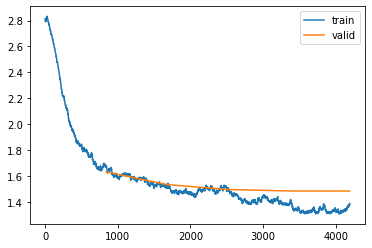

In [5]:
print(learn.recorder)
learn.recorder.plot_loss()

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
type(interp)

fastai.interpret.ClassificationInterpretation

In [7]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

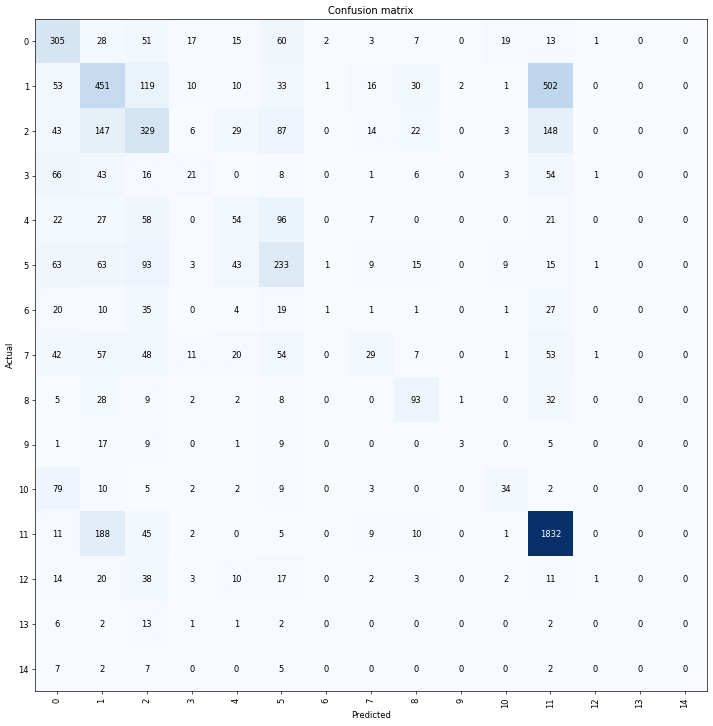

In [8]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


AttributeError: 'TabularModel' object has no attribute 'plot'

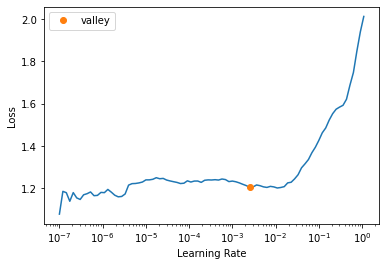